# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Adinda Chandra Ayu Kusumawardhana
- **Email:** adindachndrr19@gmail.com
- **ID Dicoding:** Adinda

## Menentukan Pertanyaan Bisnis

1.   Bagaimana pola penggunaan sepeda berdasarkan musim?
2.   Apakah kondisi cuaca mempengaruhi peningkatan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [10]:
day_df = pd.read_csv("https://raw.githubusercontent.com/adindachndrr19/submission/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/adindachndrr19/submission/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dari day_df, kita dapat menganalisis tren penggunaan sepeda dari waktu ke waktu, baik secara tahunan (2011 vs 2012) maupun bulanan.
- dengan menggunakan hour_df, kita dapat menganalisis tren penggunaan sepeda dari waktu ke waktu, baik secara tahunan (2011 vs 2012) maupun bulanan.
- Data ini bisa membantu kota atau penyedia layanan sepeda dalam mengalokasikan sumber daya (misalnya, jumlah sepeda) berdasarkan musim, waktu, atau cuaca.
- Dengan memahami pola penggunaan casual dan registered, layanan dapat ditingkatkan untuk memenuhi kebutuhan kedua segmen ini.

### Assessing Data

#### **Memeriksa tabel day_df**

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
print("Preview Dataset day_df: ")
print(day_df.head())

Preview Dataset day_df: 
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [14]:
print("Cek missing value dari Dataframe day_df: ")
print(day_df.isna().sum())

Cek missing value dari Dataframe day_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


#### **Memeriksa tabel hour_df**

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [16]:
print("Preview Dataset hour_df: ")
print(hour_df.head())

Preview Dataset hour_df: 
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [17]:
print("Cek missing value dari Dataframe hour_df: ")
print(hour_df.isna().sum())

Cek missing value dari Dataframe hour_df: 
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak terdapat missing value dalam kedua dataframe (day.csv dan hour.csv).
Dikarenakan kolom dteday masih dalam format object string, sebaiknya kolom dteday diubah menjadi format datetime.
- Sisa kolom lainnya memiliki tipe data yang sudah sesuai dengan nilai yang disimpan yakni integer dan float.

### Cleaning Data

#### Membersihkan value dari day_df

##### Memindai Duplicate data

In [18]:
print("Jumlah Data Duplikat dalam Dataset day_df: ", day_df.duplicated().sum())

Jumlah Data Duplikat dalam Dataset day_df:  0


##### Missing Value

In [19]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


#### Membersihkan value dari hour_df

##### Duplicate data

In [20]:
print("Jumlah Duplicate Data dalam Dataframe hour_df: ", hour_df.duplicated().sum())

Jumlah Duplicate Data dalam Dataframe hour_df:  0


##### Missing value

In [21]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Proses pemindaian dari duplikasi data menghasilkan nilai 0, sehingga proses dari data cleaning tidak memengaruhi value dari setiap dataframe

## Exploratory Data Analysis (EDA)

##### Menampilkan statistik dari dataframe day_df

In [22]:
print("Statistik deskriptif day_df: ")
day_df.describe(include="all")

Statistik deskriptif day_df: 


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


##### Menampilkan sebagian isi dari dataframe day_df

In [23]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
301,302,2011-10-29,4,0,10,0,6,0,3,0.254167,0.227913,0.882500,0.351371,57,570,627
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,0.475383,0.741667,0.173517,1097,5172,6269
120,121,2011-05-01,2,0,5,0,0,0,2,0.451667,0.448204,0.762083,0.106354,1138,2213,3351
402,403,2012-02-07,1,1,2,0,2,1,1,0.354167,0.361104,0.496250,0.147379,199,4176,4375
709,710,2012-12-10,4,1,12,0,1,1,2,0.435833,0.435575,0.925000,0.190308,329,4841,5170
303,304,2011-10-31,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,3669
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
527,528,2012-06-11,2,1,6,0,1,1,2,0.720833,0.659721,0.587917,0.207713,1017,5647,6664
313,314,2011-11-10,4,0,11,0,4,1,2,0.380000,0.373721,0.813333,0.189067,190,2743,2933
206,207,2011-07-26,3,0,7,0,2,1,1,0.771667,0.696979,0.540833,0.200258,750,3840,4590


In [24]:
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [54]:
# Menganalisis statistik penyewaan sepeda berdasarkan musim
season_stats = (
    day_df
    .groupby("season")["cnt"]
    .agg(
        total="sum",
        average="mean",
        maximum="max",
        minimum="min",
        std_dev="std"
    )
    .rename(index={1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"})
)

season_stats


,total,average,maximum,minimum,std_dev
season,,,,,
Spring,471348,2604.132597,7836,431,1399.942119
Summer,918589,4992.331522,8362,795,1695.977235
Fall,1061129,5644.303191,8714,1115,1459.800381
Winter,841613,4728.162921,8555,22,1699.615261


In [26]:
day_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1


##### Menampilkan statistik dari dataframe hour_df

In [27]:
print("Statistik deskriptif dari hour_df: ")
hour_df.describe(include="all")

Statistik deskriptif dari hour_df: 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


##### Menampilkan sebagian isi dari dataframe hour_df

In [28]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15632,15633,2012-10-18,4,1,10,13,0,4,1,1,0.62,0.6212,0.53,0.3582,96,236,332
10347,10348,2012-03-12,1,1,3,6,0,1,1,1,0.34,0.3485,0.57,0.1045,2,86,88
2459,2460,2011-04-17,2,0,4,9,0,0,0,1,0.40,0.4091,0.43,0.2836,31,71,102
4237,4238,2011-06-30,3,0,6,11,0,4,1,1,0.74,0.6515,0.37,0.1343,47,122,169
8876,8877,2012-01-10,1,1,1,17,0,2,1,1,0.42,0.4242,0.38,0.2537,14,446,460
5014,5015,2011-08-01,3,0,8,20,0,1,1,1,0.72,0.6818,0.62,0.2239,49,256,305
11840,11841,2012-05-13,2,1,5,13,0,0,0,1,0.68,0.6364,0.54,0.2537,255,347,602
8947,8948,2012-01-13,1,1,1,16,0,5,1,1,0.28,0.2424,0.30,0.4627,18,215,233
1852,1853,2011-03-22,2,0,3,22,0,2,1,2,0.40,0.4091,0.58,0.2537,13,57,70
11394,11395,2012-04-24,2,1,4,23,0,2,1,1,0.42,0.4242,0.38,0.0896,4,69,73


In [29]:
day_df.groupby(by="season").season.nunique().sort_values(ascending=False)

,season
season,
1,1
2,1
3,1
4,1


In [30]:
hour_df.groupby(by="weathersit").weathersit.nunique().sort_values(ascending=False)

,weathersit
weathersit,
1,1
2,1
3,1
4,1


##### Menganalisis hubungan antara jumlah penyewaan sepeda dan kondisi dari cuaca

In [53]:
# Menganalisis hubungan antara kondisi cuaca dan jumlah penyewaan sepeda
weather_stats = (
    hour_df
    .groupby("weathersit")["cnt"]
    .agg(
        total="sum",
        average="mean",
        maximum="max",
        minimum="min",
        std_dev="std"
    )
    .rename(index={1: "Snowwy", 2: "Sunny", 3: "Rainy", 4: "Cloudy"})
)

weather_stats


,total,average,maximum,minimum,std_dev
weathersit,,,,,
Snowwy,2338173,204.869272,977,1,189.487773
Sunny,795952,175.165493,957,1,165.431589
Rainy,158331,111.579281,891,1,133.781045
Cloudy,223,74.333333,164,23,77.925178


##### Mengklasifikasikan data berdasarkan "season" dam menghitung rata- rata dari jumlah penyewaan sepeda

In [32]:
season_usage = day_df.groupby("season")["cnt"].mean().reset_index()

##### Mengubah index "season" menjadi nama dari setiap musim

In [33]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
season_usage["season"] = season_usage["season"].map(season_mapping)

##### Hasil Agregasi

In [34]:
season_usage

,season,cnt
0,Spring,2604.132597
1,Summer,4992.331522
2,Fall,5644.303191
3,Winter,4728.162921


##### Mengklasifikasikan data berdasarkan "wheater situation" dan menghitung rata-rata dari jumlah penyewaan sepeda

In [35]:
weather_usage = day_df.groupby("weathersit")["cnt"].mean().reset_index()

##### Mengubah index weathersit dengan label deskriptif

In [36]:
# Mengganti angka kondisi cuaca dengan label deskriptif
weather_mapping = {1: "sunny", 2: "cloudy", 3: "rainy"}
weather_usage["weathersit"] = weather_usage["weathersit"].map(weather_mapping)

##### Hasil Agregasi

In [37]:
weather_usage

,weathersit,cnt
0,sunny,4876.786177
1,cloudy,4035.862348
2,rainy,1803.285714


##### Mengubah index bulan menjadi nama bulan

In [38]:
# Mengganti angka bulan dengan nama bulan
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}

##### Melihat jumlah penyewaan sepeda berdasarkan "month"

In [39]:
month_usage = day_df.groupby("mnth")["cnt"].sum().reset_index()

##### Hasil agregasi

In [40]:
month_usage["mnth"] = month_usage["mnth"].map(month_mapping)

month_usage

,mnth,cnt
0,January,134933
1,February,151352
2,March,228920
3,April,269094
4,May,331686
5,June,346342
6,July,344948
7,August,351194
8,September,345991
9,October,322352


##### Melihat jumlah penyewaan sepeda berdasarkan "week"

In [41]:
weekday_usage = day_df.groupby("weekday")["cnt"].sum().reset_index()

Mengubah index hari menjadi nama hari

In [42]:
weekday_mapping = {
    0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
    4: "Thursday", 5: "Friday", 6: "Saturday"
}

##### Hasil agregasi

In [43]:
weekday_usage["weekday"] = weekday_usage["weekday"].map(weekday_mapping)

weekday_usage

,weekday,cnt
0,Sunday,444027
1,Monday,455503
2,Tuesday,469109
3,Wednesday,473048
4,Thursday,485395
5,Friday,487790
6,Saturday,477807


##### Mengamati jumlah penyewaan sepeda berdasarkan "hour" dari dataframe hour_df

In [44]:
hourly_usage = hour_df.groupby("hr")["cnt"].sum().reset_index().sort_values("hr")

hourly_usage

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


##### Mengamati jumlah dari penyewaan sepeda berdasarkan kombinasi "season" dan "wheatersit"

In [52]:
# Membuat DataFrame season_weather_usage dengan cara lain
season_weather_usage = (
    day_df
    .pivot_table(index=["season", "weathersit"], values="cnt", aggfunc="sum")
    .reset_index()
    .sort_values(by=["season", "weathersit"])
)

##### Melakukan Mapping pada label "season" dan "weathersit"

In [46]:
season_weather_usage["season"] = season_weather_usage["season"].map(season_mapping)
season_weather_usage["weathersit"] = season_weather_usage["weathersit"].map(weather_mapping)

season_weather_usage

,season,weathersit,cnt
0,Spring,sunny,312036
1,Spring,cloudy,155573
2,Spring,rainy,3739
3,Summer,sunny,626986
4,Summer,cloudy,288096
5,Summer,rainy,3507
6,Fall,sunny,799443
7,Fall,cloudy,250679
8,Fall,rainy,11007
9,Winter,sunny,519487


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-50-1f708e100f0a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(
<ipython-input-50-1f708e100f0a>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])


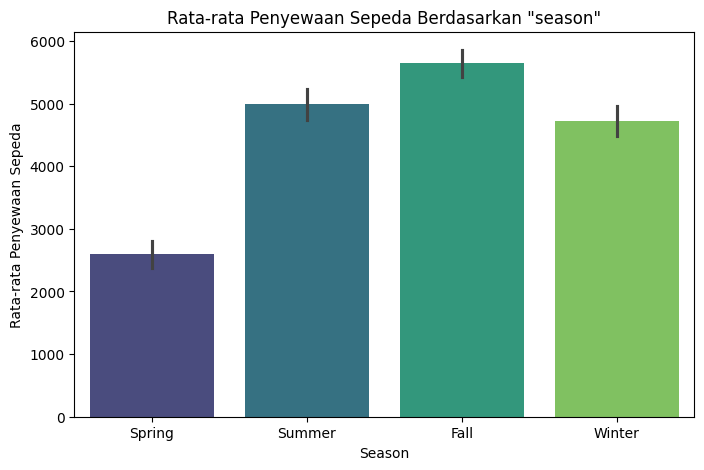

In [50]:
def plot_rentals_by_season(df):
    fig, ax = plt.subplots(figsize=(8, 5))
    bar = sns.barplot(
        data=df,
        x='season',
        y='cnt',
        estimator=np.mean,
        palette='viridis',
        ax=ax
    )

    ax.set_xlabel('Season')
    ax.set_ylabel('Rata-rata Penyewaan Sepeda')
    ax.set_title('Rata-rata Penyewaan Sepeda Berdasarkan "season"')

    ax.set_xticklabels(['Spring', 'Summer', 'Fall', 'Winter'])


plot_rentals_by_season(day_df)


### Pertanyaan 2:

<ipython-input-51-cbcbd38ff646>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-51-cbcbd38ff646>:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Sunny', 'Cloudy', 'Rainy'])


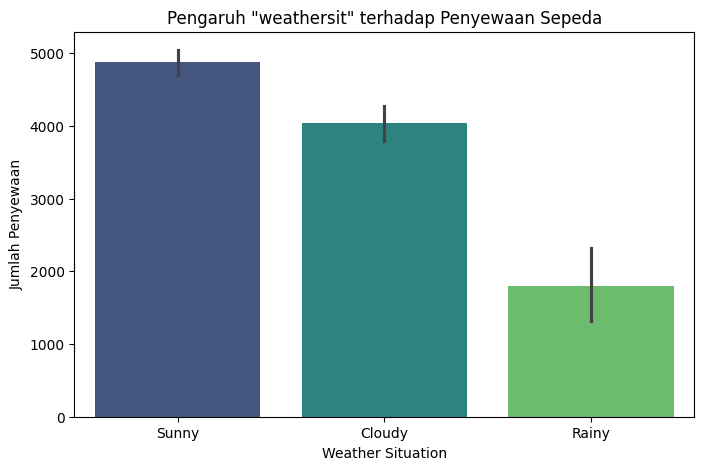

In [51]:
def plot_weather_effect(df):
    # Membuat figure dan axes menggunakan pendekatan berbasis objek
    fig, ax = plt.subplots(figsize=(8, 5))

    # Membuat barplot menggunakan seaborn dengan kontrol melalui `ax`
    sns.barplot(
        data=df,
        x='weathersit',
        y='cnt',
        palette='viridis',
        ax=ax
    )

    # Mengatur label untuk sumbu x dan y, serta judul
    ax.set_xlabel('Weather Situation')
    ax.set_ylabel('Jumlah Penyewaan')
    ax.set_title('Pengaruh "weathersit" terhadap Penyewaan Sepeda')

    # Mengatur label sumbu x menggunakan `set_xticklabels`
    ax.set_xticklabels(['Sunny', 'Cloudy', 'Rainy'])


# Memanggil fungsi
plot_weather_effect(day_df)


## Conclusion

Pola Penyewaan Sepeda Musiman
- Tingkat penyewaan sepeda tertinggi terjadi pada "fall", dan tingkat penyewaan sepeda terendah terjadi pada "Winter".
- Cuaca yang tidak stabil dengan suhu yang lebih rendah memungkinkan hujan terjadi lebih besar sehingga "Spring" memliki tingkat penyewaan yang rendah.


Pengaruh Cuaca terhadap Penyewaan Sepeda
- Ketika Cuaca mendukung orang akan lebih suka bersepeda sehingga membuat tingkat penyewaan sepeda menjadi tinggi pada saat cuaca sedang cerah(Sunny)
- Tingkat penyewaan sepeda sedikit turun dibandingkan dengan cuaca cerah (sunny) jika cuaca sedang mendung(rainy)  
- Kondisi jalan yang basah membuat bersepeda kurang nyaman sehingga menurunkan tingkat penyewaan sepeda secara signifikan.
- Hasil analisis ini menunjukkan bahwa cuaca sangat memengaruhi keputusan pelanggan untuk menyewa sepeda

Pola Umum Penggunaan Sepeda:
- Hujan adalah sebagai faktor utama dalam penurunan tingkat penyewaan sepeda secara signifikan, sehingga faktor cuaca(season) sangat memengaruhi keputusan pelanggan.
- Peningkatan pada musim panas dan gugur dan penurunan pada musim dingin dan semi menunjukkan bahwa musim-musim menentukan tingkat penyewaan sepeda.
- Selain musim dan cuaca, ada pola harian dan jam tertentu di mana penyewaan meningkat, terutama pada pagi dan sore hari, ketika kemungkinan besar penyewaan akan berkurang.

Berdasarkan analisis ini, pengelola layanan penyewaan sepeda dapat merancang strategi yang lebih efektif untuk menghadapi perubahan musim dan kondisi cuaca. Misalnya, mereka dapat mengintensifkan promosi selama musim semi untuk mendorong peningkatan penyewaan, atau menyediakan fasilitas tambahan seperti jas hujan dan jalur khusus untuk memberikan kenyamanan lebih bagi pengguna saat cuaca mendung atau hujan ringan.